<a href="https://colab.research.google.com/github/Tissyjohnson/DSA_Class_Activities/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=sns.load_dataset('iris')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df = df.drop('species', axis=1)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0


In [ ]:
numeric_cols = df.select_dtypes(include=['float64']).columns
numeric_cols


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

<Figure size 1000x600 with 0 Axes>

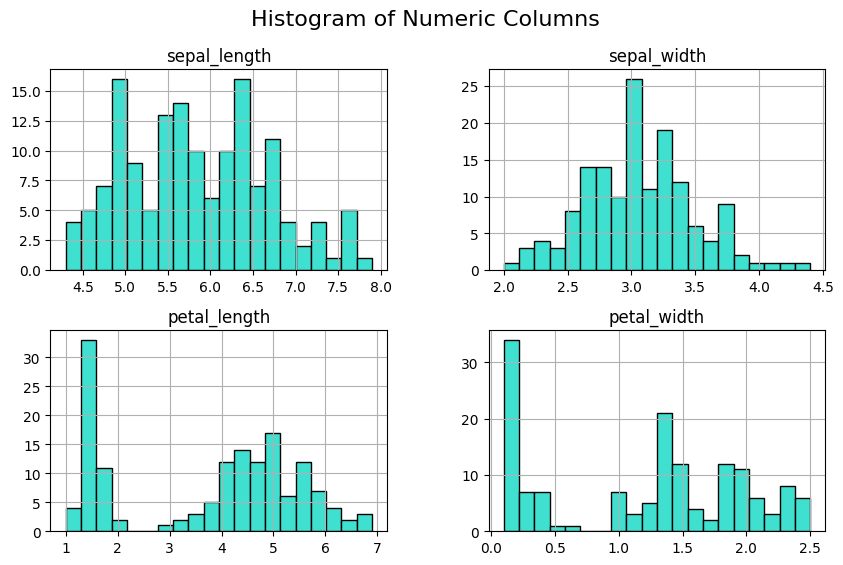

In [ ]:
plt.figure(figsize=(10,6))
df[numeric_cols].hist(bins=20 , figsize=(10,6) , color='turquoise', edgecolor='black')
plt.suptitle('Histogram of Numeric Columns', fontsize=16)
plt.show()

In [ ]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


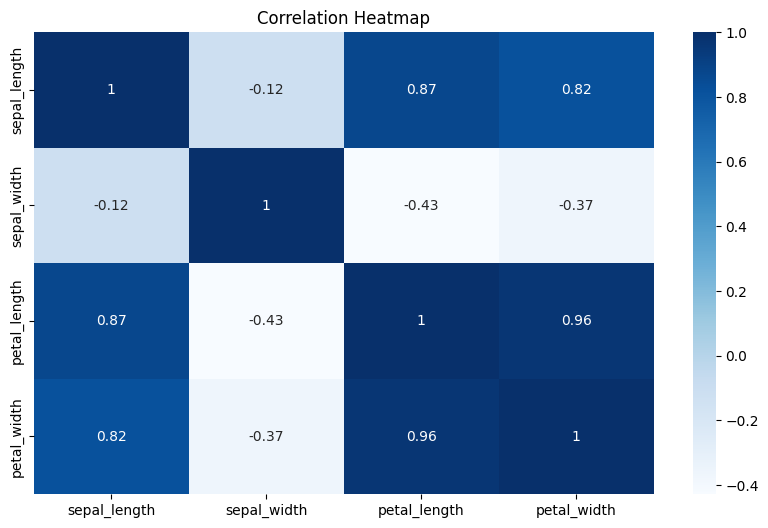

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

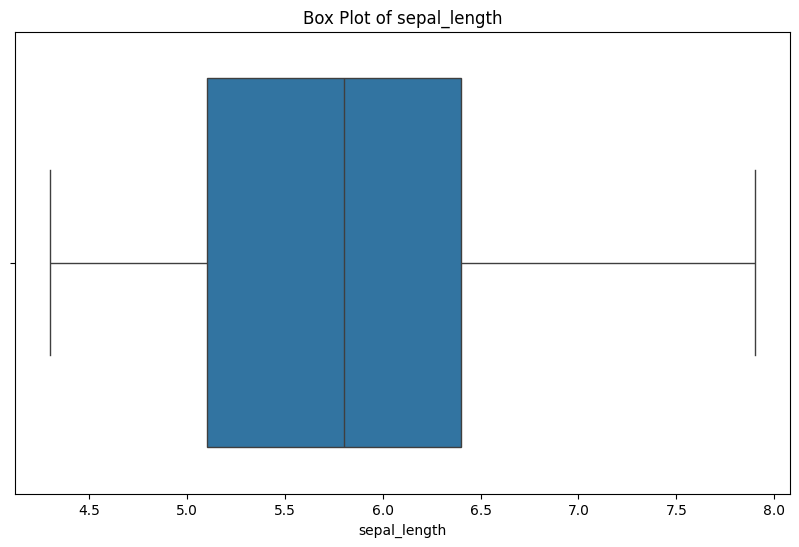

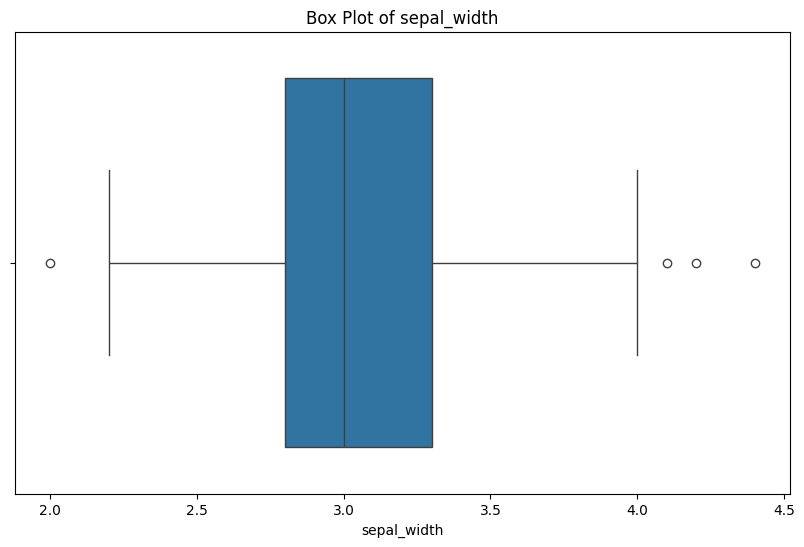

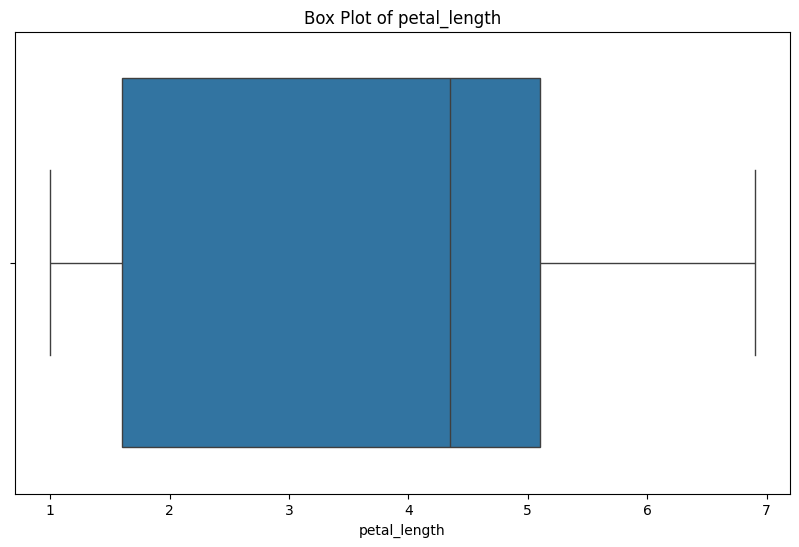

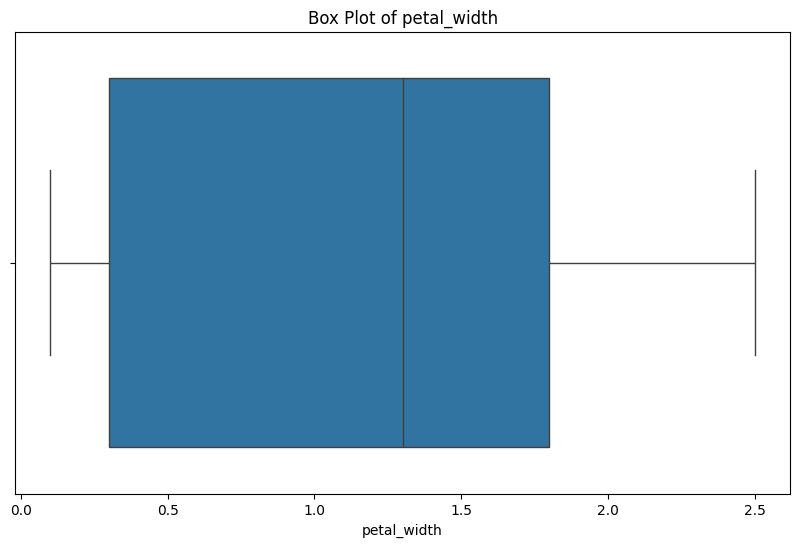

In [ ]:
import seaborn as sns
for col in numeric_cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

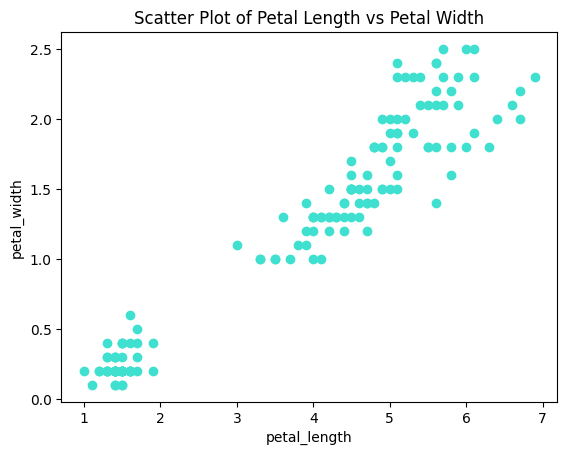

In [ ]:
x = df[['petal_length', 'petal_width']]

plt.scatter(x['petal_length'], x['petal_width'], color = 'turquoise')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[300.00000000000017,
 54.16878133149558,
 18.02696261254406,
 12.323610700345675,
 10.119159205390053,
 7.282738777626413,
 6.011187013148222,
 5.130918624626858,
 4.427993581193408,
 3.9686884389262023]

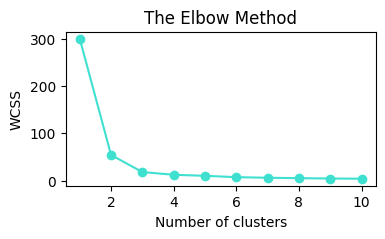

In [ ]:
plt.figure(figsize=(4,2))
plt.plot(range(1,11), wcss , marker = 'o' , color = 'turquoise')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(x_scaled)

df1["Cluster"] = kmeans.predict(x_scaled)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df1['Cluster'].value_counts()

,count
Cluster,
2,52
1,50
0,48


In [ ]:
kmeans.cluster_centers_

array([[ 1.02799959,  1.12797813],
       [-1.30498732, -1.25489349],
       [ 0.3058728 ,  0.16541778]])

<Axes: xlabel='petal_length', ylabel='petal_width'>

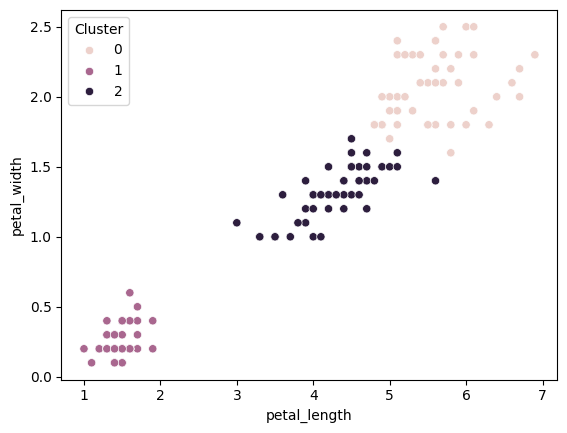

In [ ]:
sns.scatterplot(x=df1['petal_length'], y=df1['petal_width'], hue='Cluster', data=df1 )

In [ ]:
cluster_summary = df1.groupby('Cluster')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
print(cluster_summary)

         sepal_length  sepal_width  petal_length  petal_width
Cluster                                                      
0            6.639583     3.016667      5.566667      2.05625
1            5.006000     3.428000      1.462000      0.24600
2            5.913462     2.738462      4.296154      1.32500


In [ ]:
cluster_labels = {0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C'}
df1['Cluster Name'] = df1['Cluster'].map(cluster_labels)

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster,Cluster Name
0,5.1,3.5,1.4,0.2,1,Cluster B
1,4.9,3.0,1.4,0.2,1,Cluster B
2,4.7,3.2,1.3,0.2,1,Cluster B
3,4.6,3.1,1.5,0.2,1,Cluster B
4,5.0,3.6,1.4,0.2,1,Cluster B


In [ ]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(x_scaled)
score = silhouette_score(x_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5675406597587006


In [ ]:
new_iris = np.array([[1.4, 0.2]])
new_iris_scaled = scaler.transform(new_iris)
new_iris_cluster = kmeans.predict(new_iris_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


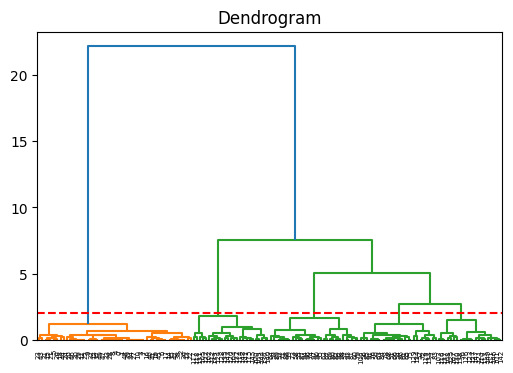

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
mergings = linkage(x_scaled,method ="ward")
plt.figure(figsize=(6,4))
dendrogram(mergings)
plt.axhline(2,color='red',linestyle='--')
plt.title('Dendrogram')

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters=3, metric= 'euclidean',linkage='ward')
new_cluster_labels = agg_hc.fit_predict(x_scaled)

In [ ]:
new_cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0])

In [ ]:
score = silhouette_score(x_scaled, new_cluster_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.609944142866424


In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters=2, metric= 'euclidean',linkage='ward')
new_cluster_labels = agg_hc.fit_predict(x_scaled)

In [ ]:
score = silhouette_score(x_scaled, new_cluster_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.743371950414545


In [ ]:
df1['agg_hc_cluster'] = new_cluster_labels

In [ ]:
df1['agg_hc_cluster'].value_counts()

,count
agg_hc_cluster,
0,75
1,50
2,25


In [ ]:
df1['Cluster'].value_counts()

,count
Cluster,
2,52
1,50
0,48
